In [1]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with sound
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf

In [2]:
data_path = "/content/drive/MyDrive/heart_sound"

In [3]:
tarin_data = data_path +"/train/"
val_data   = data_path + "/val/"

train_healthy_data   = tarin_data + '/healthy/'
train_unhealthy_data = tarin_data + '/unhealthy/'
val_healthy_data     = val_data   + '/healthy/'
val_unhealthy_data   = val_data   + '/unhealthy/'

In [4]:
def load_data(data_path):
    audio_files = []
    for file in os.listdir(data_path):
        file_path = os.path.join(data_path, file)
        audio, sr = librosa.load(file_path)
        audio_files.append(audio)
    return np.array(audio_files)

train_unhealthy_data = load_data(train_unhealthy_data)

<ipython-input-4-c6d4c87f75d6>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(audio_files)


In [5]:
def augment_data(data, sample_rate=22050, duration=10):
    augmented_data = []
    for sound in data:
        # Resample the sound to the desired sample rate
        sound = librosa.resample(sound, orig_sr=sample_rate, target_sr=sample_rate)
        
        # Trim the sound to the desired duration
        if sound.shape[0] > sample_rate * duration:
            sound = sound[:int(sample_rate * duration)]
        
        # Add augmented data to the list
        augmented_data.append(sound)
        
        # Apply random shifts in pitch and tempo
        augmented_data.append(librosa.effects.pitch_shift(sound, sample_rate, n_steps=np.random.uniform(-4, 4)))
        augmented_data.append(librosa.effects.time_stretch(sound, rate=np.random.uniform(0.8, 1.2)))
        
    return np.array(augmented_data)

train_unhealthy_data = augment_data(train_unhealthy_data)


<ipython-input-5-65ed093640d8>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(augmented_data)


In [10]:
print(len(os.listdir(train_healthy_data))) #length of healthy training sounds
print(len(train_unhealthy_data)) #length of unhelathy training sounds 
print('TOTAL TRAIN SOUNDS:', len(os.listdir(train_healthy_data)) + len(train_unhealthy_data))




2575
1995
TOTAL TRAIN SOUNDS: 4570


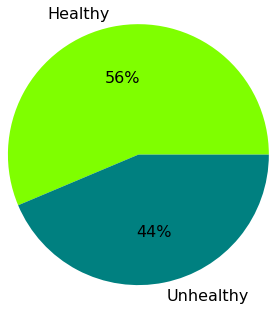

In [9]:
x = np.array([len(os.listdir(train_healthy_data)),len(train_unhealthy_data)])
labels = ['Healthy', 'Unhealthy']
colors = {'Healthy': 'chartreuse','Unhealthy': 'teal' }
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, colors = [colors[key] for key in labels], textprops={'fontsize': 16})
plt.show()

In [11]:
# Choose random soud from healthy folder
random_healthy= np.random.randint(0,len(os.listdir(train_healthy_data))) 
healthy_sound = os.listdir(train_healthy_data)[random_healthy]
healthy_sound_address = train_healthy_data+healthy_sound
healthy_sound_sample,sample_rate = librosa.load(healthy_sound_address)
ipd.Audio(healthy_sound_sample,rate=sample_rate)

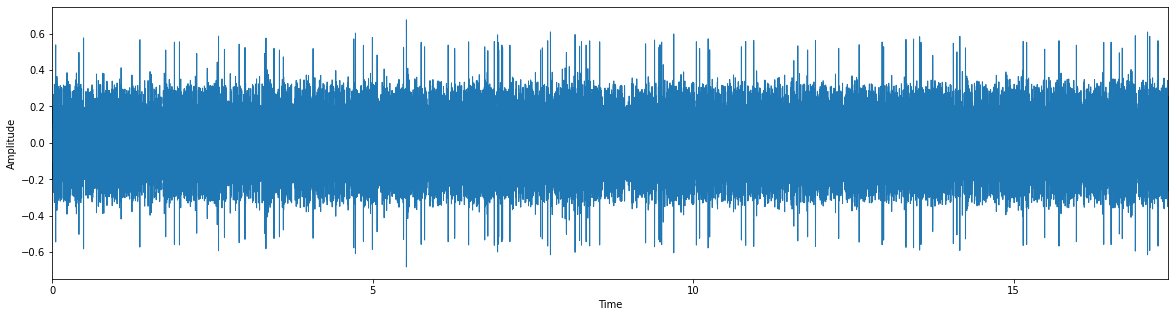

In [12]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(healthy_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

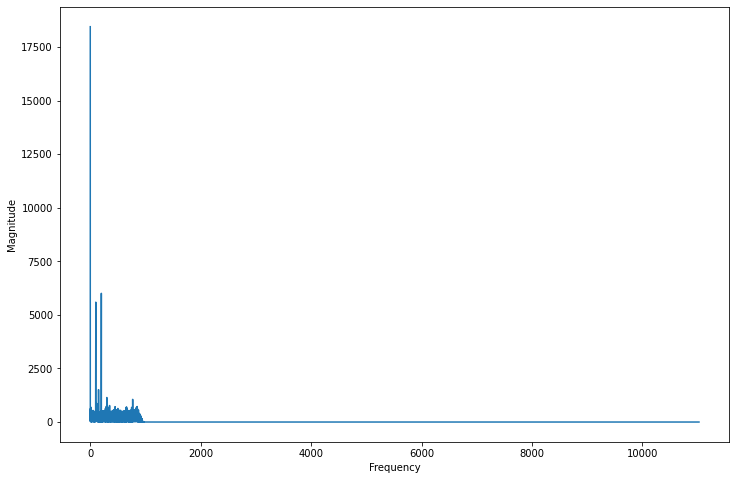

In [13]:
fft_healthy = np.fft.fft(healthy_sound_sample)
magnitude_healthy = np.abs(fft_healthy)
freq_healthy = np.linspace(0,sample_rate, len(magnitude_healthy)) 
half_freq = freq_healthy[:int(len(freq_healthy)/2)]
half_magnitude = magnitude_healthy[:int(len(freq_healthy)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

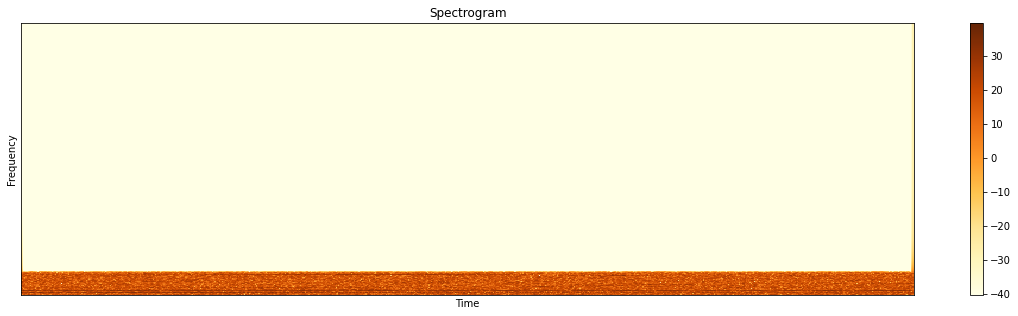

In [14]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_healthy = librosa.stft(healthy_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_healthy)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(20,5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

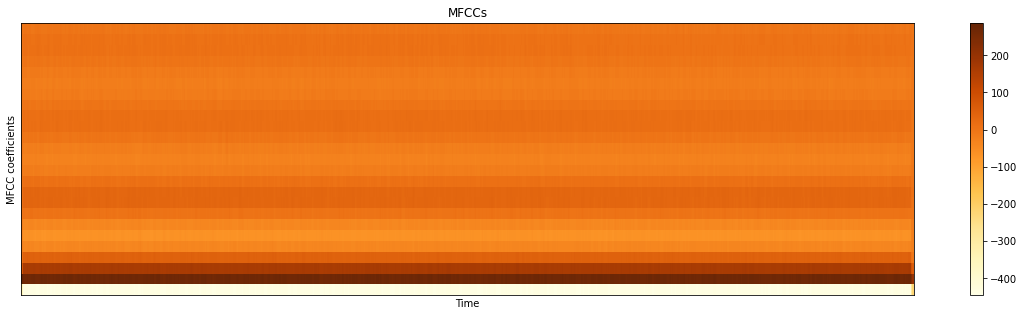

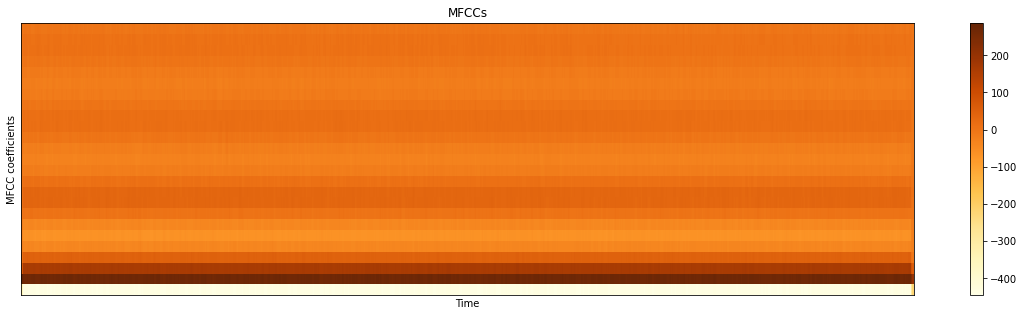

In [15]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(healthy_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(20,5))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(healthy_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(20,5))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

In [34]:
# Choose random soud from unhealthy folder
random_unhealthy= np.random.randint(0,len(train_unhealthy_data)) 
unhealthy_sound = (train_unhealthy_data)[random_unhealthy]
unhealthy_sound_sample = librosa.resample(unhealthy_sound, sample_rate, target_sr=32000)
ipd.Audio(unhealthy_sound_sample,rate=sample_rate)

In [37]:
np.save("/content/drive/MyDrive/unhealthy_data", train_unhealthy_data)

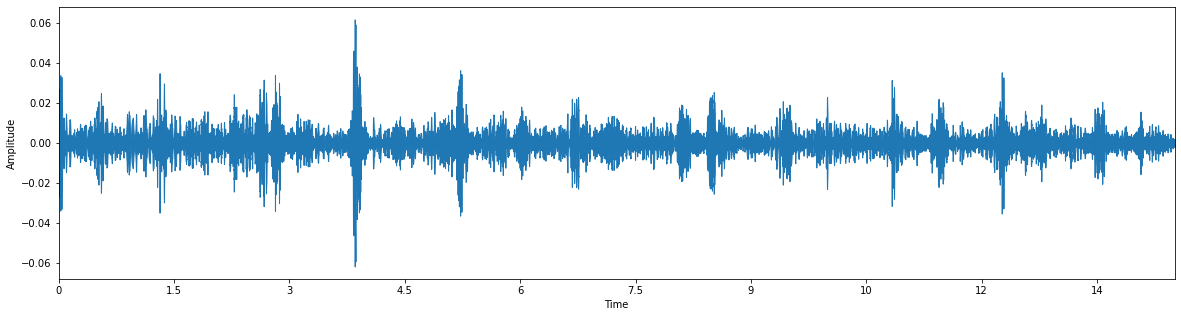

In [24]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(unhealthy_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

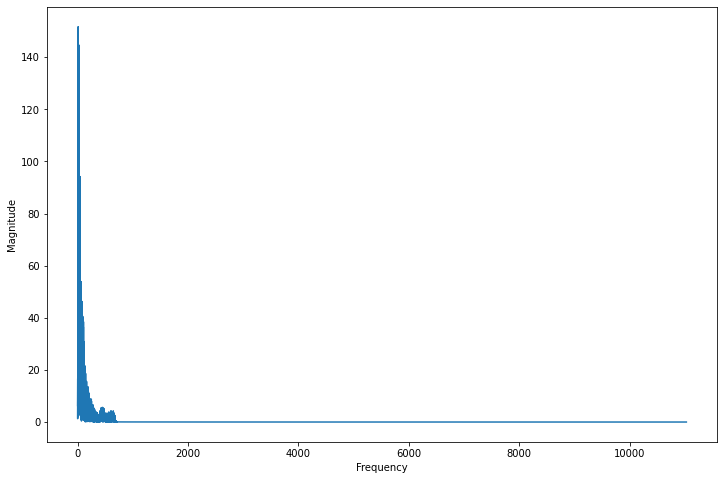

In [25]:
fft_unhealthy = np.fft.fft(unhealthy_sound_sample)
magnitude_unhealthy = np.abs(fft_unhealthy)
freq_unhealthy = np.linspace(0,sample_rate, len(magnitude_unhealthy)) 
half_freq = freq_unhealthy[:int(len(freq_unhealthy)/2)]
half_magnitude = magnitude_unhealthy[:int(len(freq_unhealthy)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

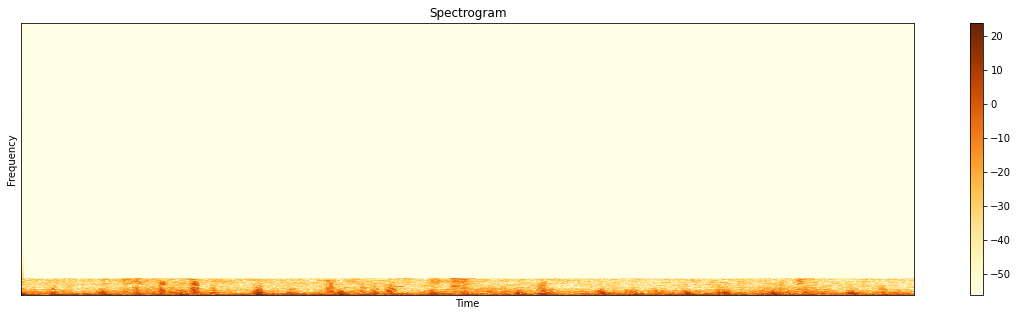

In [26]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_unhealthy = librosa.stft(unhealthy_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_unhealthy)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(20,5))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

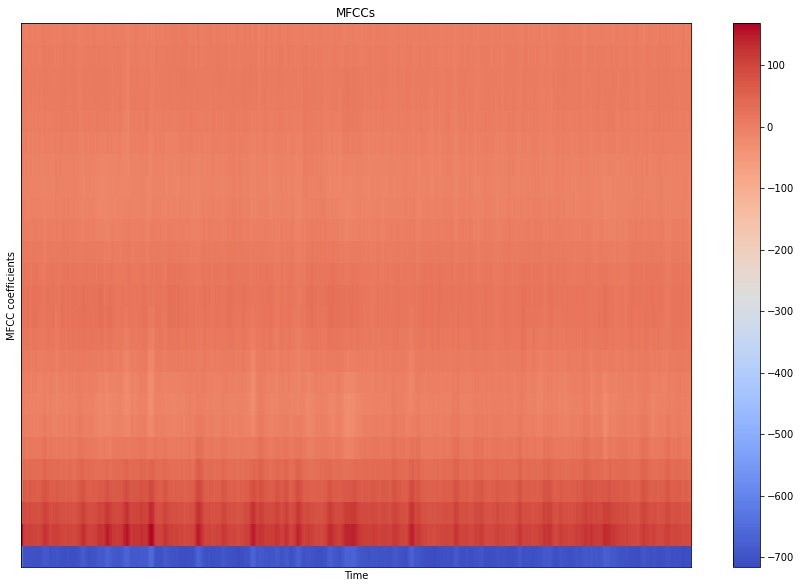

In [27]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(unhealthy_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

In [28]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration

    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, sr=sr, duration=duration,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                          
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [29]:
# simple encoding of categories, limited to 3 types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['healthy','unhealthy']
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'healthy': 0, 'unhealthy': 1}
 
{0: 'healthy', 1: 'unhealthy'}


In [30]:
# KHz
SAMPLE_RATE = 22050
# seconds
MAX_SOUND_CLIP_DURATION=10

healthy_files = fnmatch.filter(os.listdir(train_healthy_data), '*.wav')
healthy_sounds = load_file_data (folder=train_healthy_data, file_names = healthy_files, duration=MAX_SOUND_CLIP_DURATION)
healthy_labels = [0 for items in healthy_files]



print ("loaded dataset")

load file  /content/drive/MyDrive/heart_sound/train//healthy/e01119.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01050.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01101.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e00985.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01064.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01140.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01132.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e00982.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01120.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01090.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01061.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01088.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01093.wav
load file  /content/drive/MyDrive/heart_sound/train//healthy/e01

In [32]:
unhealthy_files = fnmatch.filter(train_unhealthy_data, '*.wav')
unhealthy_sounds = load_file_data(folder=train_unhealthy_data,file_names=unhealthy_files, duration=MAX_SOUND_CLIP_DURATION)
unhealthy_labels = [1 for items in unhealthy_sounds]

TypeError: ignored

In [33]:
import os

if os.path.isdir(train_unhealthy_data):
    unhealthy_files = fnmatch.filter(os.listdir(train_unhealthy_data), '*.wav')
    unhealthy_sounds = load_file_data(folder=train_unhealthy_data,file_names=unhealthy_files, duration=MAX_SOUND_CLIP_DURATION)
    unhealthy_labels = [1 for items in unhealthy_sounds]
else:
    print("Error: The directory specified by train_unhealthy_data does not exist.")


Error: The directory specified by train_unhealthy_data does not exist.
